In [1]:
from helpers.io_helper import IO_Helper
from store_error_arrs import _get_filename
from collections import defaultdict


RUN_SIZE = 'full'
ARRAYS_FOLDER = 'arrays'
MODELS_FOLDER = 'models'

BASE_MODEL_ERROR_SCORES = ['ae']
PROB_MODEL_ERROR_SCORES = ['crps', 'ae', 'ssr']

PLOT_FOR_TEST = True
PLOT_FOR_TRAIN = False

SHOW_PLOTS = True
SAVE_PLOTS = True


METHODS_WHITELIST = {
    # 'base_model_hgbr',
    # 'base_model_linreg',
    # 'base_model_nn',
    'native_qhgbr',
    'native_qr',
    'native_gp',
    'native_mvnn',
    'posthoc_cp_hgbr',
    'posthoc_cp_linreg',
    'posthoc_cp_nn',
    'posthoc_la_nn',
}


METHOD_TO_ARR_NAMES_DICT = {
    # 'base_model_hgbr': ['base_model_hgbr_n210432_it30_its3.npy'],
    # 'base_model_linreg': ['base_model_linreg_n210432.npy'],
    # 'base_model_nn': ['base_model_nn_n210432_it400_nh2_hs50.npy'],
    'native_qhgbr': [
        'native_qhgbr_y_pred_n210432_it0.npy',
        'native_qhgbr_y_quantiles_n210432_it0.npy',
        'native_qhgbr_y_std_n210432_it0.npy',
    ],
    'native_qr': [
        'native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_quantiles_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_std_n210432_it300_nh2_hs50.npy',
    ],
    'native_gp': [
        'native_gpytorch_y_pred_n210432_it200_new.npy',
        'native_gpytorch_y_quantiles_n210432_it200_new.npy',
        'native_gpytorch_y_std_n210432_it200_new.npy',
    ],
    'native_mvnn': [
        'native_mvnn_y_pred_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_quantiles_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_std_n210432_it100_nh2_hs50.npy',
    ],
    'posthoc_cp_hgbr': [
        'posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_linreg': [
        'posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_nn': [
        'posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_quantiles_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_std_n210432_it5_cp2.npy',
    ],
    'posthoc_la_nn': [
        'posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_quantiles_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_std_n210432_it1000_la2.npy',
    ],
}


def split_pred_arrs_train_test(arrs, n_samples_train):
    arrs_train = list(map(lambda arr: arr[:n_samples_train], arrs))
    arrs_test = list(map(lambda arr: arr[n_samples_train:], arrs))
    return arrs_train, arrs_test


print('loading error arrays')

io_helper = IO_Helper(arrays_folder=ARRAYS_FOLDER, models_folder=MODELS_FOLDER)

# assume test for simplicity
# dataset_to_plot_for = []
# if PLOT_FOR_TRAIN:
#     dataset_to_plot_for.append('training')
# if PLOT_FOR_TEST:
#     dataset_to_plot_for.append('test')

error_arrs = defaultdict(dict)
for uq_method in METHODS_WHITELIST:
    print(f'loading for {uq_method=}')
    error_scores = BASE_MODEL_ERROR_SCORES if uq_method.startswith('base_model') else PROB_MODEL_ERROR_SCORES
    dataset = 'test'
    for error_score in error_scores:
        filename = _get_filename(infix=error_score, uq_method=uq_method, dataset=dataset,
                                 method_to_arr_names_dict=METHOD_TO_ARR_NAMES_DICT)
        error_arr_filename = f'{filename}.npy'
        try:
            error_arr = io_helper.load_array(filename=error_arr_filename)
        except FileNotFoundError as e:
            print(f'error score array {e.filename} not found, skipping')
            continue
        error_arrs[error_score][uq_method] = error_arr
print('done')

INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ssr_test.npy
INFO:root:loading array from comparis

loading error arrays
loading for uq_method='posthoc_cp_nn'
loading for uq_method='native_qr'
loading for uq_method='posthoc_la_nn'
loading for uq_method='posthoc_cp_hgbr'
loading for uq_method='native_qhgbr'


INFO:root:loading array from comparison_storage\arrays\native_qhgbr_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ssr_test.npy


loading for uq_method='native_gp'
loading for uq_method='native_mvnn'
loading for uq_method='posthoc_cp_linreg'
done


In [6]:
# method_pairs = {
#     ['native_mvnn', 'posthoc_cp_nn'],
#     ['native_mvnn', 'posthoc_la_nn'],
#     ['native_qhgbr', 'posthoc_cp_hgbr'],
#     ['native_qr', 'posthoc_cp_linreg'],
#     ['native_gp', None],
# }

TYPE_TO_METHOD_PAIRS = {
    'Baseline: QR vs. CP Linreg': ['native_qr', 'posthoc_cp_linreg'],
    'Tree: QHGBR vs. CP HGBR': ['native_qhgbr', 'posthoc_cp_hgbr'],
    'NN: MVNN vs. CP': ['native_mvnn', 'posthoc_cp_nn'],
    'NN: MVNN vs. LA': ['native_mvnn', 'posthoc_la_nn'],
    'GP': ['native_gp', None],
}

error_arrs_pairwise = {
    error_score: {
        method_type: (error_arrs_dict[method_nat],
                      error_arrs_dict[method_post] if method_post is not None else None)
        for method_type, (method_nat, method_post) in TYPE_TO_METHOD_PAIRS.items()
    }
    for error_score, error_arrs_dict in error_arrs.items()
}
error_arrs_pairwise

{'crps': {'Baseline: QR vs. CP Linreg': (array([ 41.870596  ,  88.28804407,  53.42155324, ...,  54.26170519,
           81.11899351, 102.20362927]),
   array([ 67.42292293,  59.22690249,  65.01441428, ..., 129.89395898,
          121.51412182, 116.90738039])),
  'Tree: QHGBR vs. CP HGBR': (array([31.65117053, 59.11122658, 30.38690361, ..., 83.11393964,
          62.22974796, 85.49551234]),
   array([ 31.3059425 ,  62.20075252,  30.68117284, ..., 104.1358645 ,
           98.12966672, 135.93517014])),
  'NN: MVNN vs. CP': (array([110.32114311, 214.68030796, 188.83509033, ...,  39.68913682,
           34.12210628,  34.53739446]),
   array([ 37.96728346,  47.33813185,  37.72314794, ...,  59.6114589 ,
           86.71892814, 110.63871703])),
  'NN: MVNN vs. LA': (array([110.32114311, 214.68030796, 188.83509033, ...,  39.68913682,
           34.12210628,  34.53739446]),
   array([ 43.45456689,  51.3891017 ,  43.23881027, ...,  61.92612969,
           85.82925731, 107.55121937])),
  'GP': (ar

MAIN
Baseline: QR vs. CP Linreg
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
Tree: QHGBR vs. CP HGBR
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. CP
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. LA
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
GP
plotting histogram for error_score='crps'...


INFO:root:saving plot to comparison_storage\plots\hist_plot.pdf


plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
saving plot
showing plot


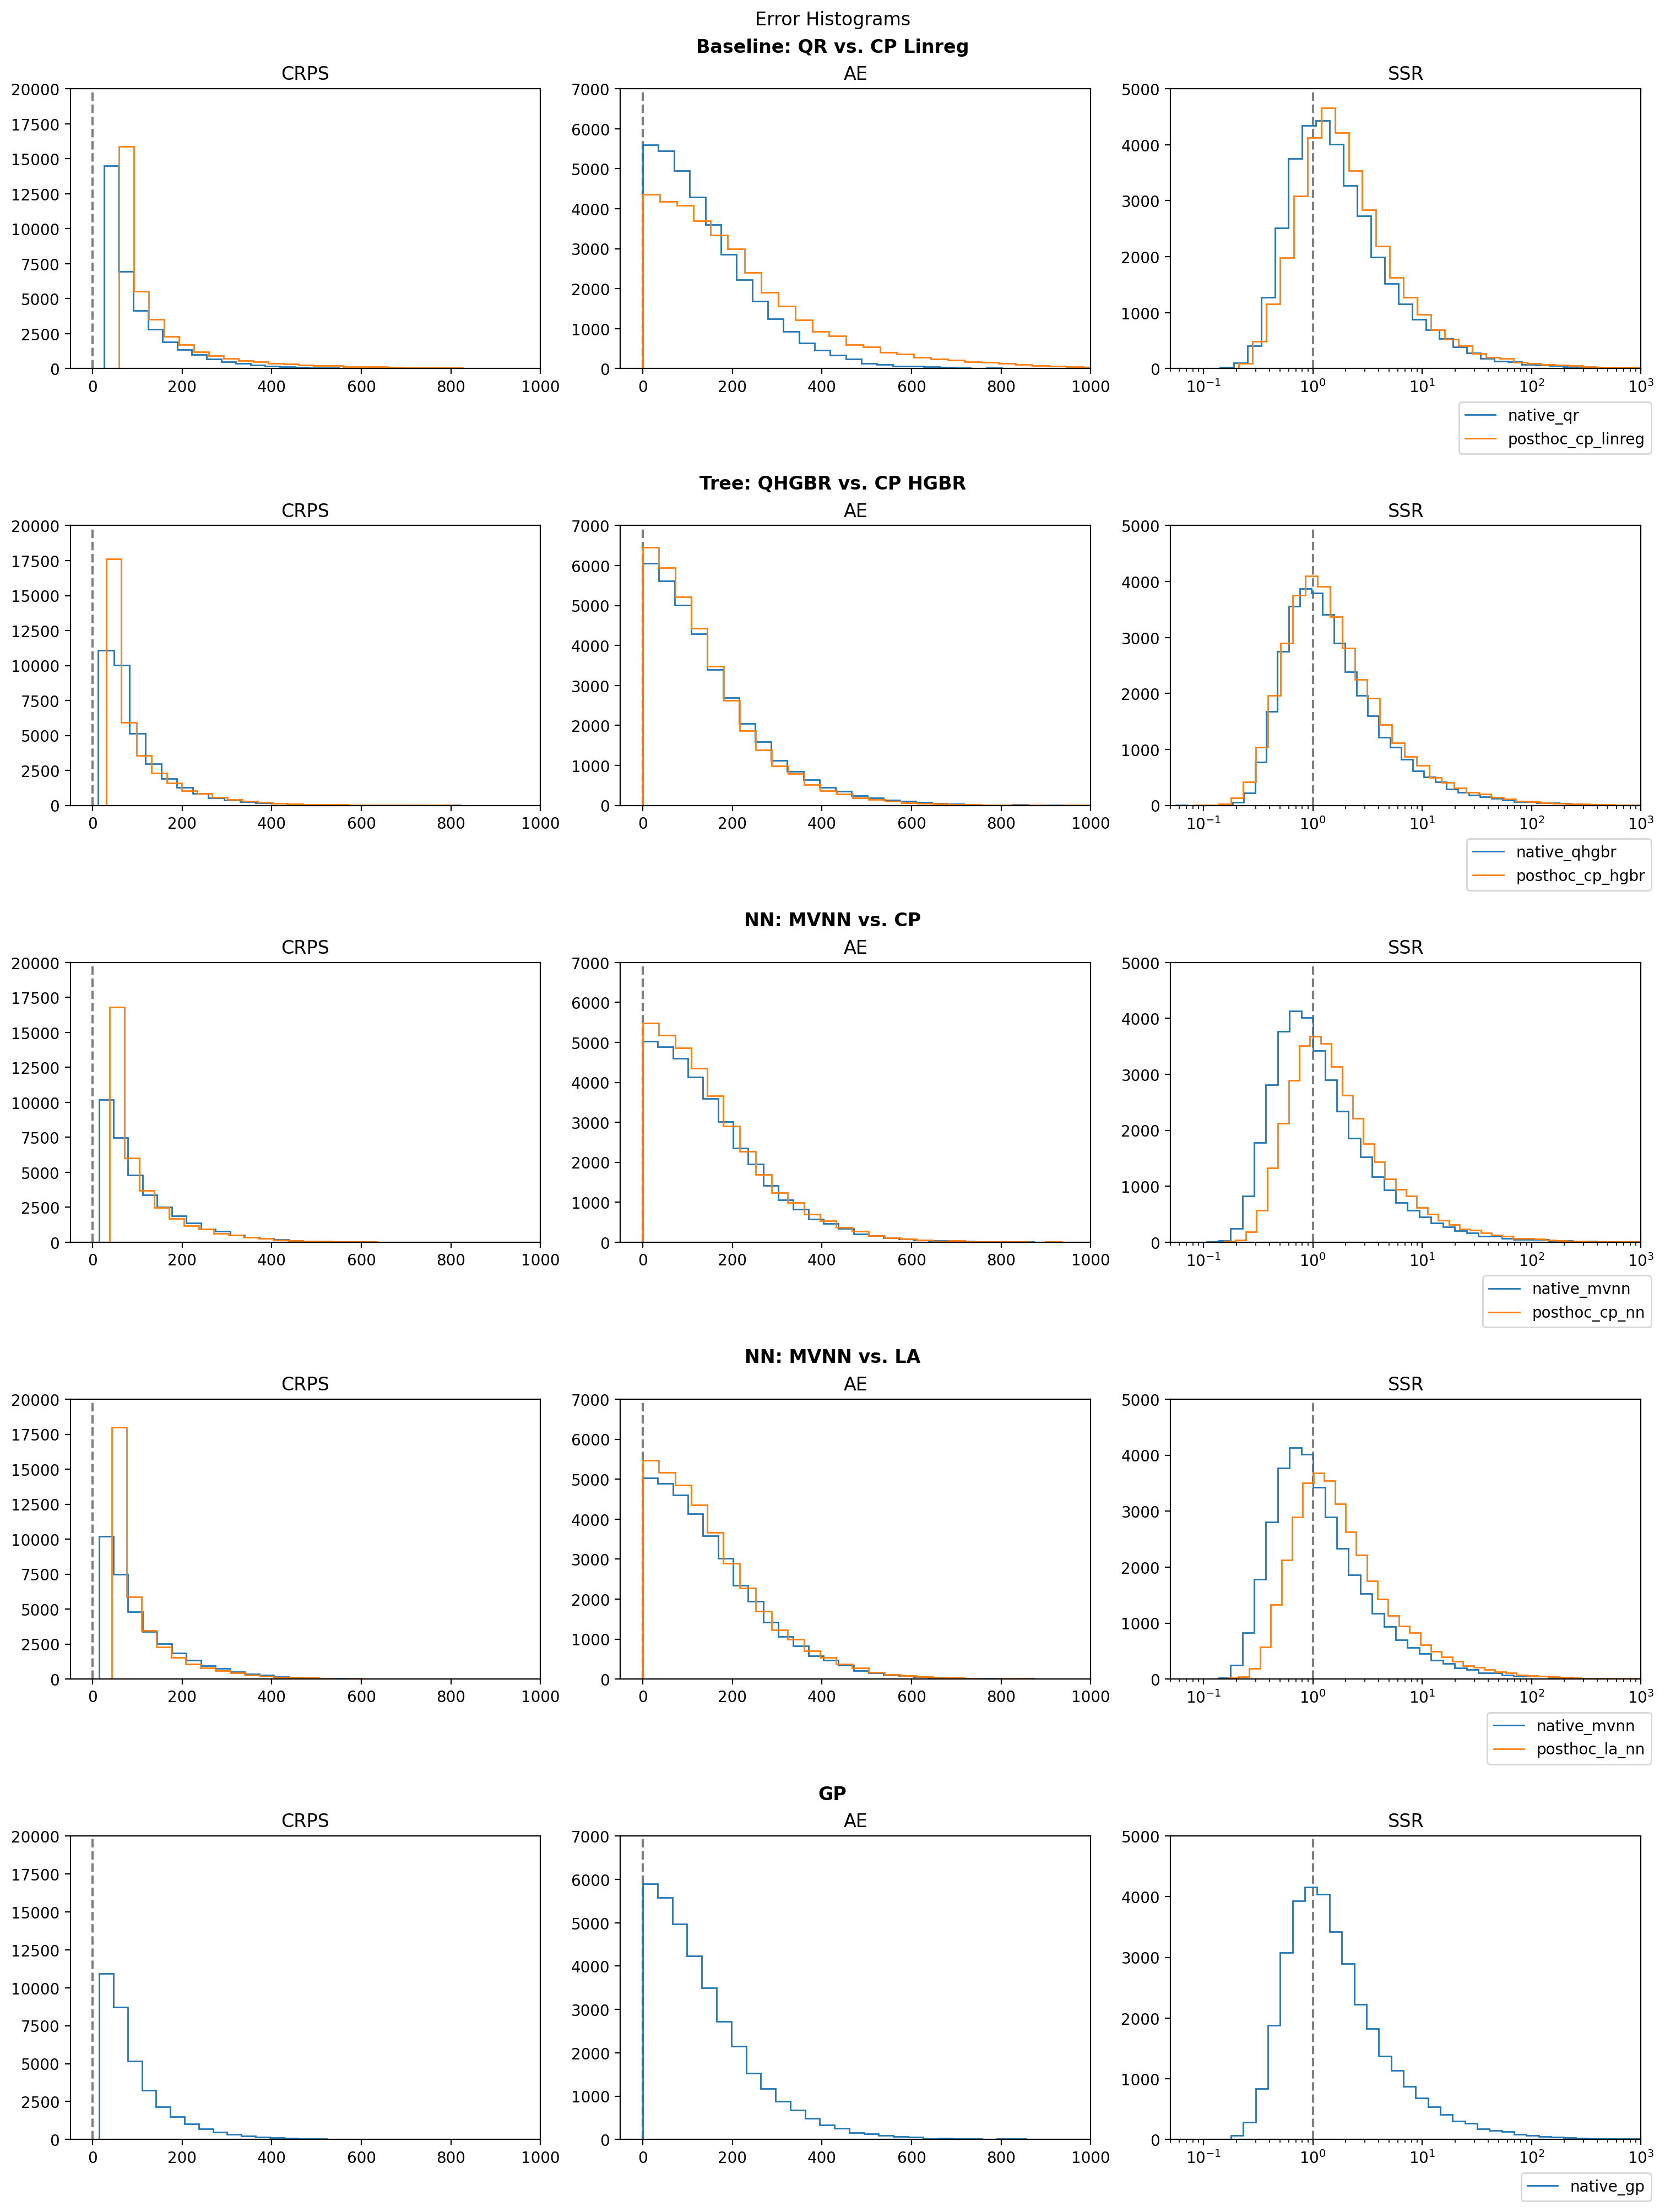


WORST
Baseline: QR vs. CP Linreg
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
Tree: QHGBR vs. CP HGBR
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. CP
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. LA
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
GP
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...


INFO:root:saving plot to comparison_storage\plots\hist_plot_worst.pdf


saving plot
showing plot


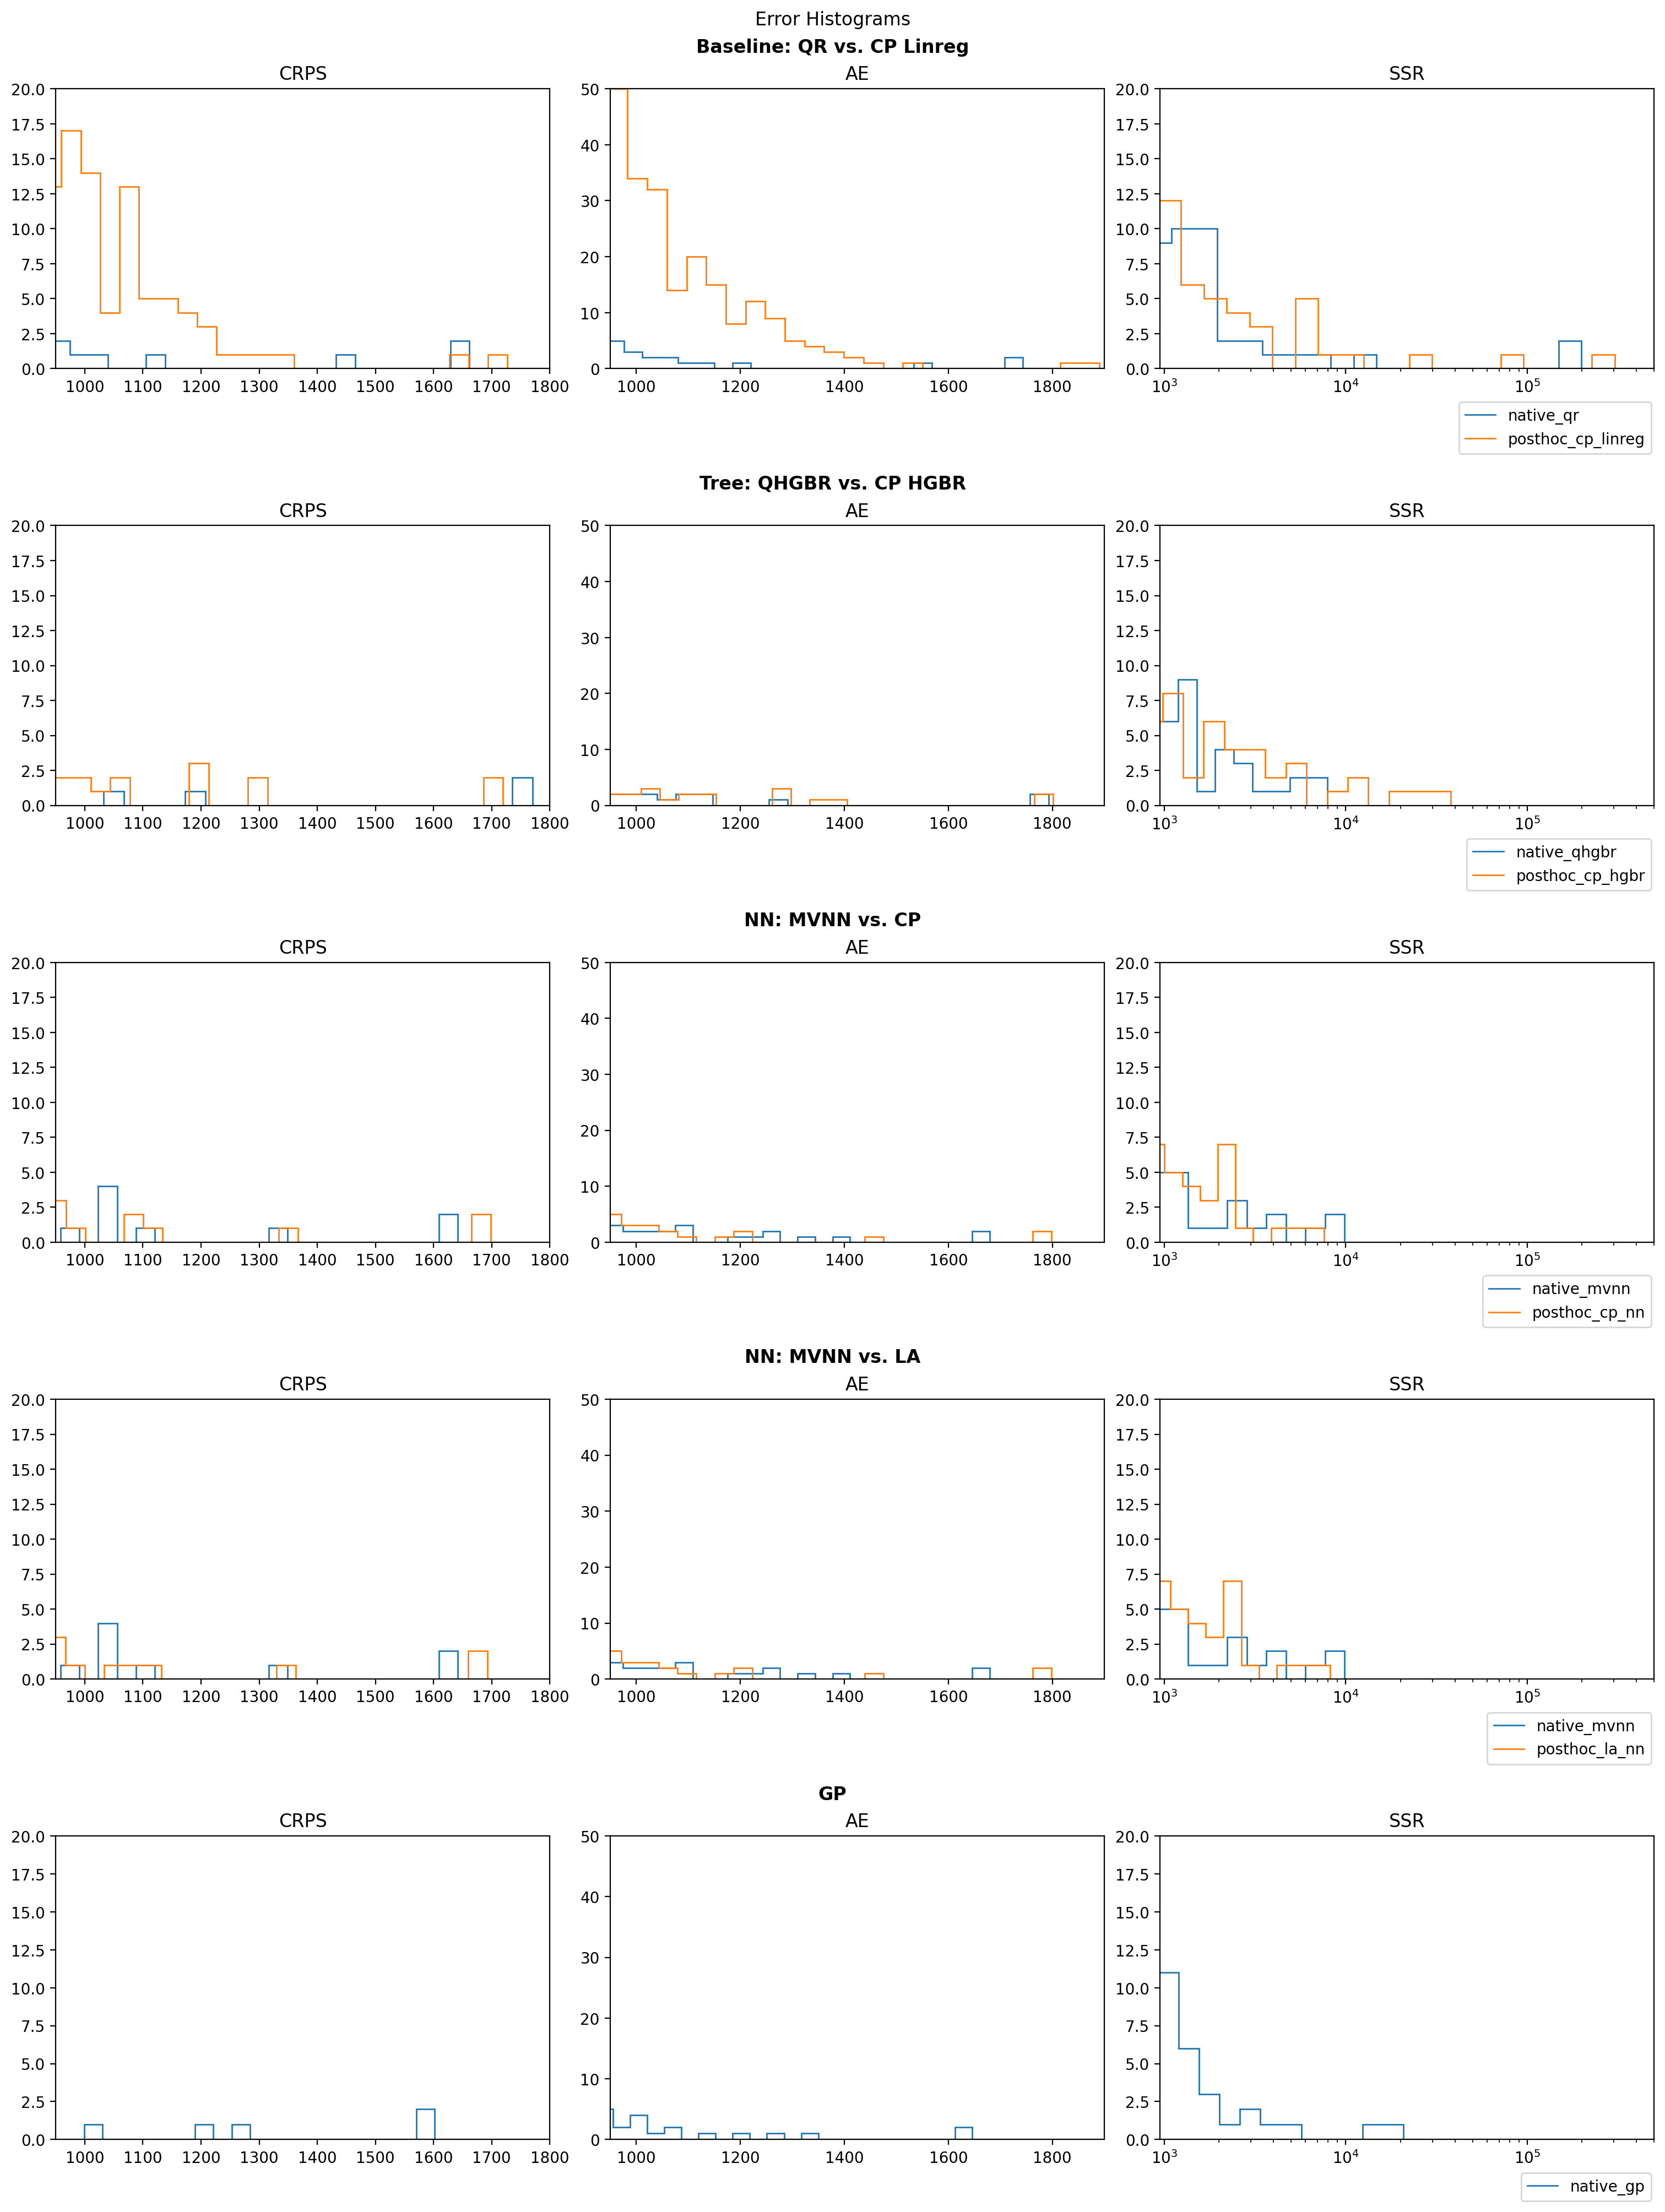

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np


DPI = 200
BINS = 50
LOG_SCALES_FLAGS_XY = {
    'crps': [False, False],
    'ae': [False, False],
    'ssr': [True, False],
}
AXES_LIMS_MAIN = {
    'crps': [[-50, 1e3], [0, 20000]],  # 600
    'ae': [[-50, 1e3], [0, 7000]],  # 800
    'ssr': [[5e-2, 1e3], [0, 5000]],
}
AXES_LIMS_WORST = {
    'crps': [[950, 1800], [0, 20]],
    'ae': [[950, 1900], [0, 50]],
    'ssr': [[950, 5e5], [0, 20]],
}
FILENAME_MAIN = f'hist_plot.pdf'
FILENAME_WORST = f'hist_plot_worst.pdf'
NORMALIZE = False


def plot_hist(arr, ax=None, bins=25, log_scale_x=True, normalize=False):
    if log_scale_x:
        # code by https://stackoverflow.com/a/47850787  + comment by user6655984
        logbins = np.geomspace(arr.min(), arr.max(), bins+1)
        bins = logbins
    # ax.hist(arr, bins=bins, histtype='step')
    
    counts, bins = np.histogram(arr, bins=bins)
    if normalize:
        counts = counts.astype(float)
        counts /= counts.max()
    ax.stairs(counts, bins)


def plot_hists(axes_lims, filename):
    fig = plt.figure(figsize=(15, 20), layout='constrained', dpi=DPI)
    fig.suptitle('Error Histograms')
    subfigs = fig.subfigures(nrows=len(TYPE_TO_METHOD_PAIRS), ncols=1)
    for subfig, method_type in zip(subfigs, TYPE_TO_METHOD_PAIRS.keys()):
        print(method_type)
        subfig.suptitle(method_type, fontweight='bold')
        
        axs = subfig.subplots(nrows=1, ncols=len(error_arrs))
        for ax, (error_score, error_arr_dict) in zip(axs, error_arrs_pairwise.items()):
            print(f'plotting histogram for {error_score=}...')
            log_scale_x, log_scale_y = LOG_SCALES_FLAGS_XY[error_score]
            if log_scale_x:
                ax.set_xscale('log')
            if log_scale_y:
                ax.set_yscale('log')
    
            for error_arr in error_arr_dict[method_type]:
                if error_arr is None:
                    continue
                plot_hist(error_arr, ax=ax, log_scale_x=log_scale_x, bins=BINS, normalize=NORMALIZE)

            axvline_x = 1 if error_score == 'ssr' else 0
            ax.axvline(x=axvline_x, color='grey', linestyle='--', zorder=0)
            
            ax.set_xlim(axes_lims[error_score][0])
            ax.set_ylim(axes_lims[error_score][1])
            
            ax.set_title(error_score.upper())
        legend_labels = TYPE_TO_METHOD_PAIRS[method_type]
        if legend_labels[1] is None:
            legend_labels = legend_labels[:1]
        subfig.legend(legend_labels, loc='outside lower right')
        # break
    
    if filename is not None:
        print('saving plot')
        io_helper.save_plot(filename=filename)
    print('showing plot')
    plt.show()

print('MAIN')
plot_hists(AXES_LIMS_MAIN, FILENAME_MAIN)

print()
print('WORST')
plot_hists(AXES_LIMS_WORST, FILENAME_WORST)